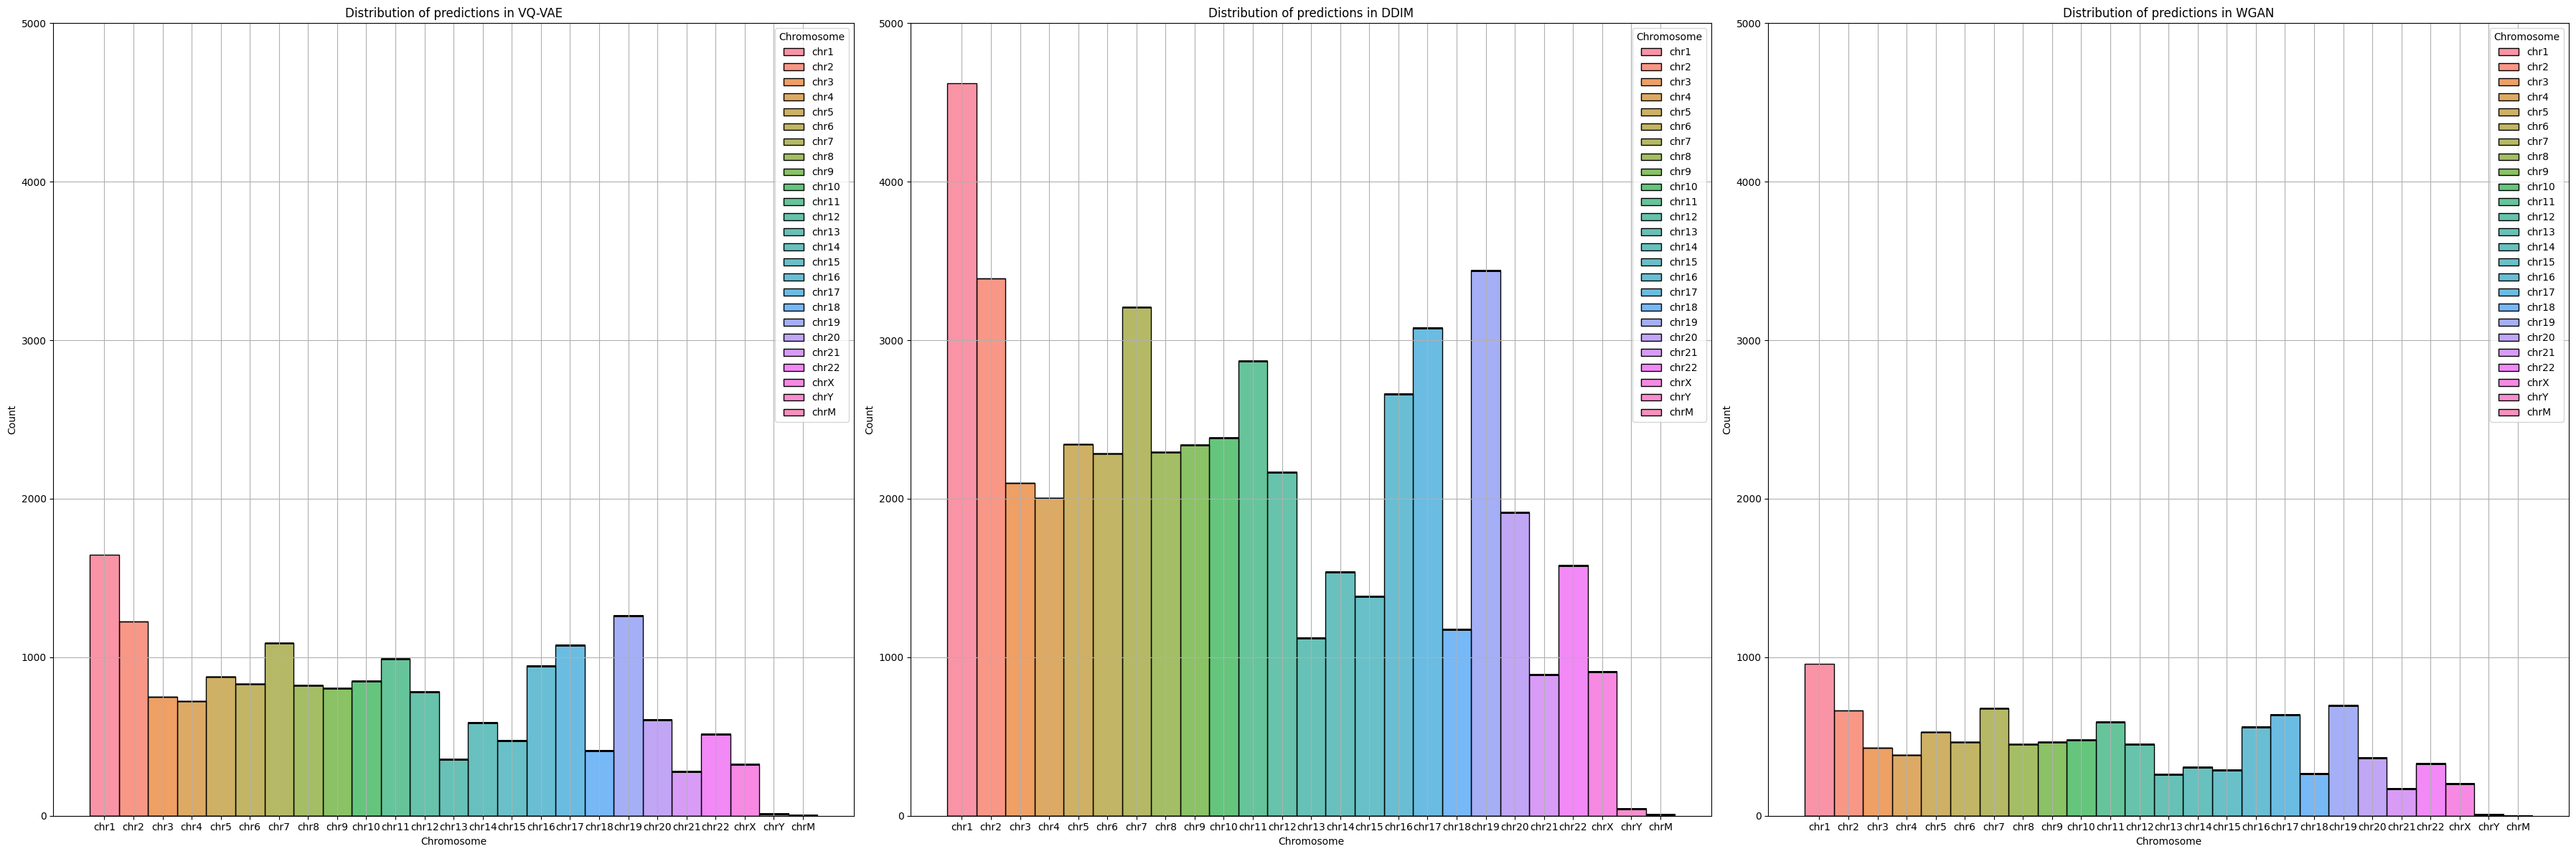

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.spatial import KDTree
import editdistance
import re
from tabulate import tabulate

def process_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data_list = []
    current_chr = None

    for line in lines:
        line = line.strip()
        if line.startswith('chr'):
            current_chr = line
        elif line:
            try:
                start, end = map(int, line.split())
                data_list.append({'Chromosome': current_chr, 'Start': start, 'End': end})
            except ValueError:
                pass

    return data_list

# Process each file
data_list1 = process_file('/content/text_predictions_for_diff.txt')
data_list2 = process_file('/content/text_predictions_vqvae.txt')
data_list3 = process_file('/content/text_predictions_wgan.txt')


df1 = pd.DataFrame(data_list1)
df2 = pd.DataFrame(data_list2)
df3 = pd.DataFrame(data_list3)

plt.figure(figsize=(36, 12))
plt.subplot(131)
sns.histplot(data=df1, x='Chromosome', hue='Chromosome', multiple="stack", palette='husl')
plt.title('Distribution of predictions in VQ-VAE')
plt.xlabel('Chromosome')
plt.ylabel('Count')
plt.ylim(0, 5000)

plt.grid(True)
plt.subplot(132)
sns.histplot(data=df2, x='Chromosome', hue='Chromosome', multiple="stack", palette='husl')
plt.title('Distribution of predictions in DDIM')
plt.xlabel('Chromosome')
plt.ylabel('Count')
plt.ylim(0, 5000)

plt.grid(True)
plt.subplot(133)
sns.histplot(data=df3, x='Chromosome', hue='Chromosome', multiple="stack", palette='husl')
plt.title('Distribution of predictions in WGAN')
plt.xlabel('Chromosome')
plt.ylabel('Count')
plt.ylim(0, 5000)

plt.tight_layout()
plt.grid(True)
plt.show()

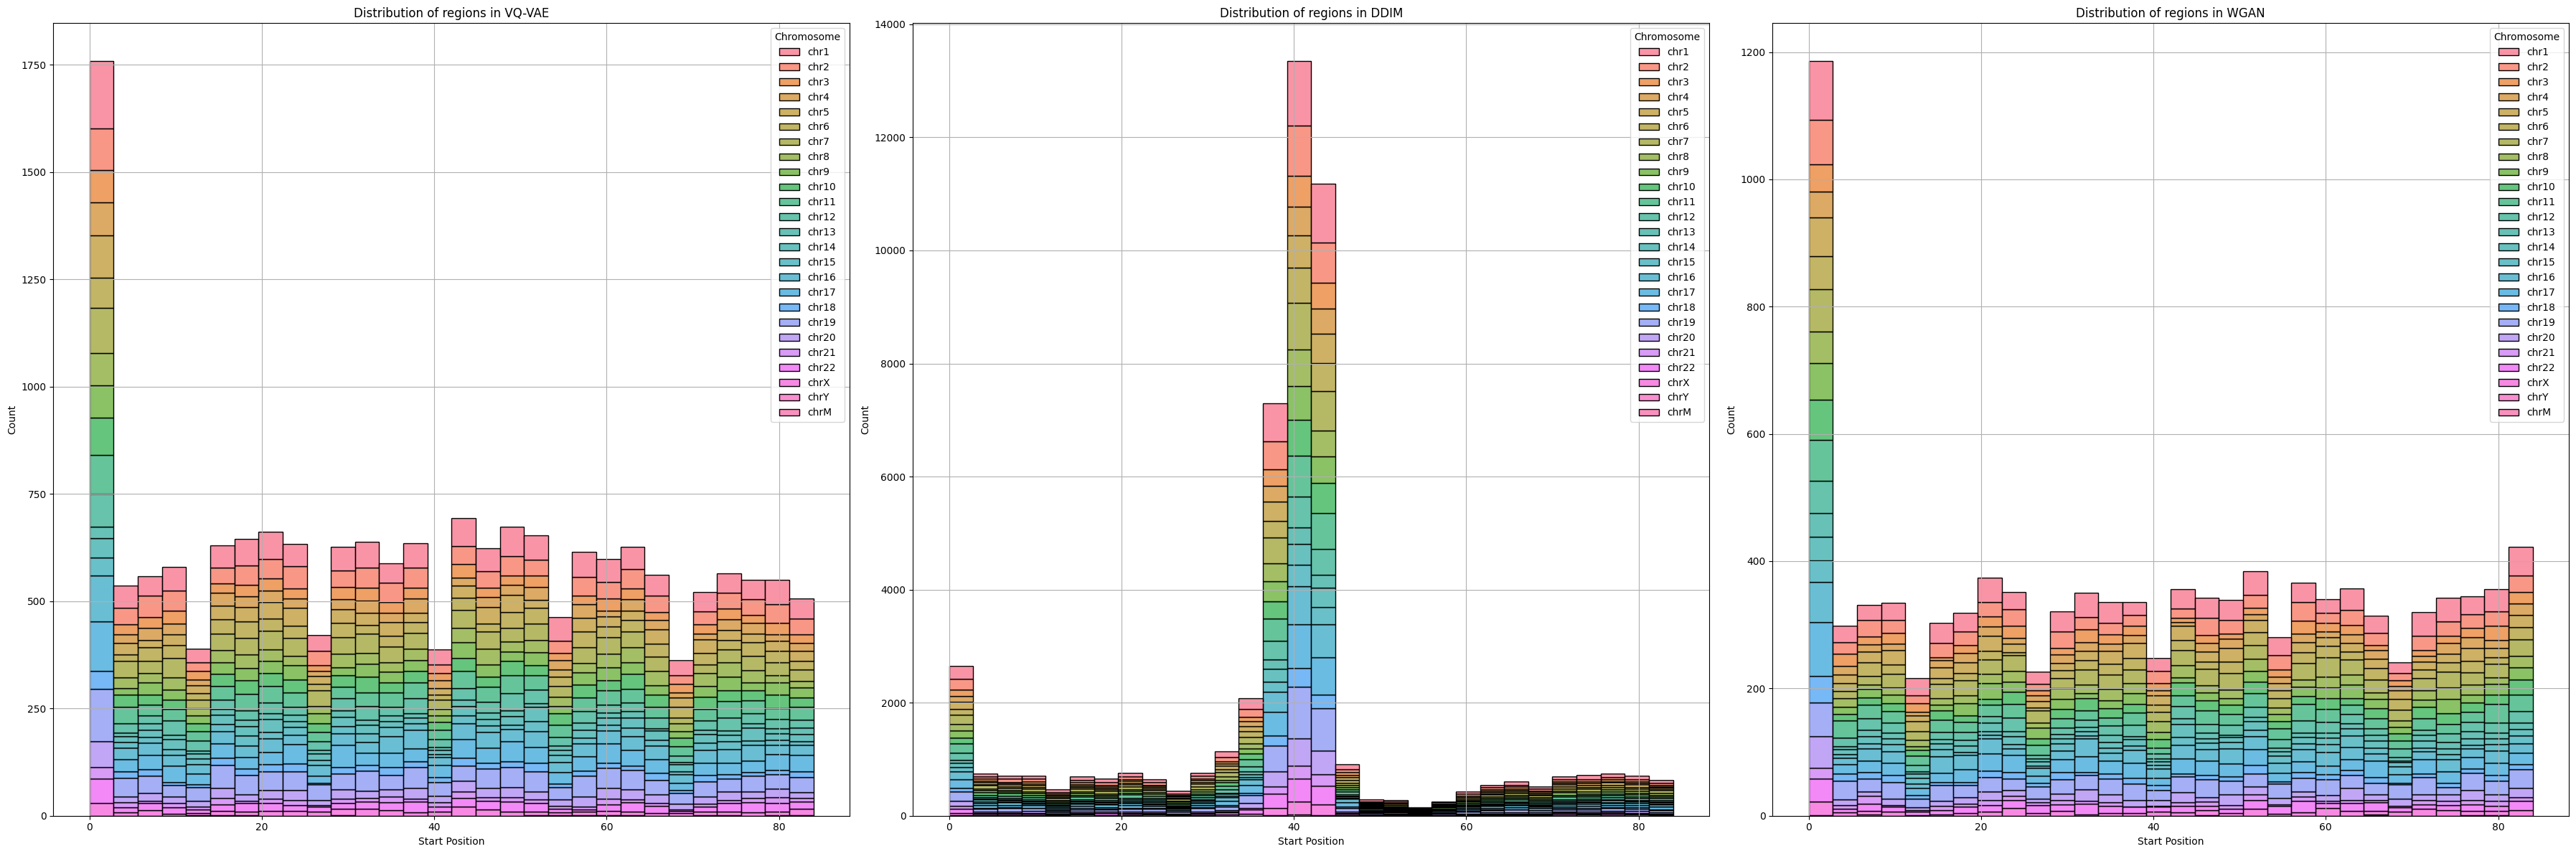

In [ ]:
def process_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data_list = []
    current_chr = None

    for line in lines:
        line = line.strip()
        if line.startswith('chr'):
            current_chr = line
        elif line:
            try:
                start, end = map(int, line.split())
                data_list.append({'Chromosome': current_chr, 'Start': start, 'End': end})
            except ValueError:
                pass

    return data_list

data_list1 = process_file('/content/text_predictions_for_diff.txt')
data_list2 = process_file('/content/text_predictions_vqvae.txt')
data_list3 = process_file('/content/text_predictions_wgan.txt')


df1 = pd.DataFrame(data_list1)
df2 = pd.DataFrame(data_list2)
df3 = pd.DataFrame(data_list3)

plt.figure(figsize=(36, 12))

plt.subplot(131)
sns.histplot(data=df1, x='Start', hue='Chromosome', multiple="stack", bins=30, palette='husl')
plt.title('Distribution of regions in VQ-VAE')
plt.xlabel('Start Position')
plt.ylabel('Count')

plt.grid(True)
plt.subplot(132)
sns.histplot(data=df2, x='Start', hue='Chromosome', multiple="stack", bins=30, palette='husl')
plt.title('Distribution of regions in DDIM')
plt.xlabel('Start Position')
plt.ylabel('Count')

plt.grid(True)
plt.subplot(133)
sns.histplot(data=df3, x='Start', hue='Chromosome', multiple="stack", bins=30, palette='husl')
plt.title('Distribution of regions in WGAN')
plt.xlabel('Start Position')
plt.ylabel('Count')

plt.tight_layout()

plt.grid(True)
plt.show()

In [ ]:
!pip install weblogo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.7/571.7 kB 4.9 MB/s eta 0:00:00


In [ ]:
from weblogo import *

fin = open('/content/diff_generated_sequences (2).fasta')
seqs = read_seq_data(fin)
logodata = LogoData.from_seqs(seqs)
logooptions = LogoOptions()
logooptions.title = "A Logo Title"
logoformat = LogoFormat(logodata, logooptions)
eps = eps_formatter(logodata, logoformat)

In [ ]:
bedWK_df = pd.read_csv('/content/drive/My Drive/DeepZ_data_creation/data/hg19_zdna/raw/WuKou16_filter_norm_to_512.bed', sep='\t', comment='t', header=None)
bed16_df = pd.read_csv('/content/drive/My Drive/DeepZ_data_creation/data/hg19_zdna/raw/zdna2016_filter_norm_to_512.bed', sep='\t', comment='t', header=None)
bedG_df = pd.read_csv('/content/drive/My Drive/data_for_gans/G4_Chip_seq_filter_norm_to_500.bed', sep='\t', comment='t', header=None)

In [ ]:
un_bed_dataset = pd.concat([bedWK_df, bed16_df]).reset_index(drop=True)
un_bed_dataset = pd.concat([un_bed_dataset, bedG_df]).reset_index(drop=True)

In [ ]:
un_bed_dataset.columns = ['chrom', 'chromStart', 'chromEnd']

In [ ]:
un_bed_dataset

,chrom,chromStart,chromEnd
0,chr1,845296,845808
1,chr1,845379,845891
2,chr1,845802,846314
3,chr1,845896,846408
4,chr1,848188,848700
...,...,...,...
53379,chrX,154255151,154255663
53380,chrX,154299323,154299835
53381,chrY,10033277,10033789
53382,chrY,10037570,10038082


In [ ]:
df3

,Chromosome,Start,End
0,chr1,73,86
1,chr1,82,94
2,chr1,38,55
3,chr1,50,64
4,chr1,42,61
...,...,...,...
10633,chrX,7,26
10634,chrX,0,14
10635,chrX,73,92
10636,chrX,2,12


In [ ]:
def process_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data_list = []
    current_chr = None

    for line in lines:
        line = line.strip()
        if line.startswith('chr'):
            current_chr = line
        elif line:
            try:
                start, end = map(int, line.split())
                data_list.append({'Chromosome': current_chr, 'Start': start, 'End': end})
            except ValueError:
                pass

    return data_list

data_list1 = process_file('/content/text_predictions_for_diff.txt')
data_list2 = process_file('/content/text_predictions_vqvae.txt')
data_list3 = process_file('/content/text_predictions_wgan.txt')


df1 = pd.DataFrame(data_list1)
df2 = pd.DataFrame(data_list2)
df3 = pd.DataFrame(data_list3)

In [ ]:
new_data = []

for index, row in df1.iterrows():
    chrom = row['Chromosome']
    start_offset = row['Start']
    end_offset = row['End']

    chrom_start = un_bed_dataset.loc[un_bed_dataset['chrom'] == chrom, 'chromStart'].values[0]
    chrom_end = un_bed_dataset.loc[un_bed_dataset['chrom'] == chrom, 'chromEnd'].values[0]

    new_start = chrom_start + start_offset
    new_end = chrom_start + end_offset

    new_data.append({'chrom': chrom, 'new_chromStart': new_start, 'new_chromEnd': new_end})

new_df = pd.DataFrame(new_data)

# Save the new DataFrame to a file
new_df.to_csv('new_bed_diff.csv', index=False)

In [ ]:
new_df

,chrom,new_chromStart,new_chromEnd
0,chr1,845352,845365
1,chr1,845296,845308
2,chr1,845377,845390
3,chr1,845296,845311
4,chr1,845358,845369
...,...,...,...
18246,chrX,2746572,2746593
18247,chrX,2746546,2746560
18248,chrX,2746536,2746550
18249,chrY,3452219,3452238


In [ ]:
new_data = []

for index, row in df2.iterrows():
    chrom = row['Chromosome']
    start_offset = row['Start']
    end_offset = row['End']

    chrom_start = un_bed_dataset.loc[un_bed_dataset['chrom'] == chrom, 'chromStart'].values[0]
    chrom_end = un_bed_dataset.loc[un_bed_dataset['chrom'] == chrom, 'chromEnd'].values[0]

    new_start = chrom_start + start_offset
    new_end = chrom_start + end_offset

    new_data.append({'chrom': chrom, 'new_chromStart': new_start, 'new_chromEnd': new_end})

new_df_vae = pd.DataFrame(new_data)

new_df_vae.to_csv('new_bed_vae.csv', index=False)

In [ ]:
new_data = []

for index, row in df3.iterrows():
    chrom = row['Chromosome']
    start_offset = row['Start']
    end_offset = row['End']

    chrom_start = un_bed_dataset.loc[un_bed_dataset['chrom'] == chrom, 'chromStart'].values[0]
    chrom_end = un_bed_dataset.loc[un_bed_dataset['chrom'] == chrom, 'chromEnd'].values[0]

    new_start = chrom_start + start_offset
    new_end = chrom_start + end_offset

    new_data.append({'chrom': chrom, 'new_chromStart': new_start, 'new_chromEnd': new_end})

new_df_gan = pd.DataFrame(new_data)

new_df_gan.to_csv('new_bed_gan.csv', index=False)

In [ ]:
new_df_gan

,chrom,new_chromStart,new_chromEnd
0,chr1,845369,845382
1,chr1,845378,845390
2,chr1,845334,845351
3,chr1,845346,845360
4,chr1,845338,845357
...,...,...,...
10633,chrX,2746543,2746562
10634,chrX,2746536,2746550
10635,chrX,2746609,2746628
10636,chrX,2746538,2746548


In [ ]:
new_df_vae

,chrom,new_chromStart,new_chromEnd
0,chr1,845339,845353
1,chr1,845336,845353
2,chr1,845337,845354
3,chr1,845354,845369
4,chr1,845338,845353
...,...,...,...
51741,chrX,2746576,2746593
51742,chrX,2746602,2746621
51743,chrX,2746579,2746599
51744,chrX,2746575,2746595


In [ ]:
new_df

,chrom,new_chromStart,new_chromEnd
0,chr1,845352,845365
1,chr1,845296,845308
2,chr1,845377,845390
3,chr1,845296,845311
4,chr1,845358,845369
...,...,...,...
18246,chrX,2746572,2746593
18247,chrX,2746546,2746560
18248,chrX,2746536,2746550
18249,chrY,3452219,3452238


In [ ]:
import csv

def csv_to_bed(csv_filename, bed_filename):
    with open(csv_filename, 'r') as csv_file, open(bed_filename, 'w') as bed_file:
        csv_reader = csv.reader(csv_file)
        bed_writer = csv.writer(bed_file, delimiter='\t')

        for row in csv_reader:
            chromosome = row[0]
            start = row[1]
            end = row[2]

            additional_columns = row[3:]

            # Write to BED file
            bed_writer.writerow([chromosome, start, end] + additional_columns)

# For classifier

In [ ]:
csv_to_bed('/content/new_bed_diff.csv', 'new_bed_diff.bed')
csv_to_bed('/content/new_bed_gan.csv', 'new_bed_gan.bed')
csv_to_bed('/content/new_bed_vae.csv', 'new_bed_vae.bed')

In [ ]:
!mkdir sparse_vector

In [ ]:
import pandas as pd
from tqdm import tqdm_notebook, tqdm
from collections import defaultdict
import numpy as np
from sparse_vector.sparse_vector import SparseVector
import os
from joblib import load, dump, Parallel, delayed

taget_antigen = ['DNase-seq', 'Histone', 'RNA polymerase', 'TFs and others']
chroms = [f'chr{i}' for i in list(range(1, 23)) + ['X', 'Y','M']]

In [ ]:
def chrom_reader(chrom):
    files = sorted([i for i in os.listdir(f'/content/drive/MyDrive/DeepZ_data_creation/data/hg19_dna/') if f"{chrom}_" in i])
    return ''.join([load(f"/content/drive/MyDrive/DeepZ_data_creation/data/hg19_dna/{file}") for file in files])

In [ ]:
dna = {chrom:chrom_reader(chrom) for chrom in tqdm_notebook(chroms)}
lens_of_chroms = {chrom: len(dna[chrom]) for chrom in dna}
del dna

<ipython-input-6-0227fbfed577>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  dna = {chrom:chrom_reader(chrom) for chrom in tqdm_notebook(chroms)}


  0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
files = sorted(os.listdir('/content/drive/MyDrive/DeepZ_data_creation/data/hg19_features/raw/'))[::-1]

def sparser(file, lens_of_chroms, chroms):
#     print(file)
    loc_dd = {}
    df = pd.read_csv(f'/content/drive/MyDrive/DeepZ_data_creation/data/hg19_features/raw/{file}', header=None, sep='\t')
    for chrom, sub_df in tqdm(df.groupby(0), desc=file):
        if chrom not in chroms:
            continue
        vec = np.zeros(lens_of_chroms[chrom])
        for inter in sub_df.values:
            vec[inter[1]:inter[2]+1] = np.maximum(vec[inter[1]:inter[2]+1], inter[4])
        loc_dd[chrom] = SparseVector(vec)

    dump(loc_dd, f'/content/drive/MyDrive/DeepZ_data_creation/data/hg19_features/sparse/{file[:-4]}.pkl', 3)

In [ ]:
done_files = set([i[:-4] for i in os.listdir('/content/drive/MyDrive/DeepZ_data_creation/data/hg19_features/sparse/')])
files = [file for file in files if file[:-4] not in done_files]

In [ ]:
Parallel(n_jobs = -1,
         backend= "multiprocessing")(delayed(sparser)(file, lens_of_chroms, chroms)
                                      for file in files if file.endswith('.bed'))

Convert beds to DeepZ format

In [ ]:
loc_dd = {chrm:SparseVector(lens_of_chroms[chrm]) for chrm in chroms}
df = pd.read_csv(f'new_bed_diff.bed', sep='\t')
for chrom, sub_df in tqdm(df.groupby('chrom')):
    if chrom not in chroms:
        continue
    vec = np.zeros(lens_of_chroms[chrom])
    for inter in sub_df.values:
        vec[inter[1]:inter[2]+1] = np.maximum(vec[inter[1]:inter[2]+1], 1)
    loc_dd[chrom] = SparseVector(vec)

dump(loc_dd, f'new_bed_diff.pkl', 3)

100%|██████████| 25/25 [00:31<00:00,  1.27s/it]


['new_bed_diff.pkl']

In [ ]:
df

,chrom,new_chromStart,new_chromEnd
0,chr1,845339,845353
1,chr1,845336,845353
2,chr1,845337,845354
3,chr1,845354,845369
4,chr1,845338,845353
...,...,...,...
51741,chrX,2746576,2746593
51742,chrX,2746602,2746621
51743,chrX,2746579,2746599
51744,chrX,2746575,2746595


In [ ]:
df = pd.read_csv(f'new_bed_vae.bed', sep='\t')
for chrom, sub_df in tqdm(df.groupby('chrom')):
    if chrom not in chroms:
        continue
    vec = np.zeros(lens_of_chroms[chrom])
    for inter in sub_df.values:
        vec[inter[1]:inter[2]+1] = np.maximum(vec[inter[1]:inter[2]+1], 1)
    loc_dd[chrom] = SparseVector(vec)

dump(loc_dd, f'new_bed_vae.pkl', 3)

100%|██████████| 25/25 [00:28<00:00,  1.15s/it]


['new_bed_vae.pkl']

In [ ]:
df = pd.read_csv(f'new_bed_gan.bed', sep='\t')
for chrom, sub_df in tqdm(df.groupby('chrom')):
    if chrom not in chroms:
        continue
    vec = np.zeros(lens_of_chroms[chrom])
    for inter in sub_df.values:
        vec[inter[1]:inter[2]+1] = np.maximum(vec[inter[1]:inter[2]+1], 1)
    loc_dd[chrom] = SparseVector(vec)

dump(loc_dd, f'new_bed_gan.pkl', 3)

100%|██████████| 25/25 [00:27<00:00,  1.11s/it]


['new_bed_gan.pkl']

In [ ]:
df1 = pd.read_csv(f'/content/WuKou16.bed', sep='\t', header=None)
df2 = pd.read_csv(f'/content/zdna2016.bed', sep='\t', header=None)

In [ ]:
columns = ["chrom", "start", "end"]

In [ ]:
df1.columns, df2.columns = columns, columns

In [ ]:
df1

,chrom,start,end
0,chr1,845543,845560
1,chr1,845627,845642
2,chr1,846050,846065
3,chr1,846142,846161
4,chr1,848436,848452
...,...,...,...
44295,chr14,74222812,74223196
44296,chr16,80837960,80838344
44297,chr1,149982538,149982922
44298,chr3,150321147,150321531


In [ ]:
df = pd.concat([df1, df2], axis=0)

In [ ]:
for chrom, sub_df in tqdm(df.groupby('chrom')):
    if chrom not in chroms:
        continue
    vec = np.zeros(lens_of_chroms[chrom])
    for inter in sub_df.values:
        vec[inter[1]:inter[2]+1] = np.maximum(vec[inter[1]:inter[2]+1], 1)
    loc_dd[chrom] = SparseVector(vec)

dump(loc_dd, f'Zdna_new.pkl', 3)

100%|██████████| 24/24 [00:43<00:00,  1.79s/it]


['Zdna_new.pkl']

In [ ]:
df_diff = pd.read_csv(f'/content/new_bed_diff.csv')
df_gan = pd.read_csv(f'/content/new_bed_gan.csv')
df_vae = pd.read_csv(f'/content/new_bed_vae.csv')

In [ ]:
df

,chrom,start,end
0,chr1,845543,845560
1,chr1,845627,845642
2,chr1,846050,846065
3,chr1,846142,846161
4,chr1,848436,848452
...,...,...,...
358,chr14,74222812,74223196
359,chr16,80837960,80838344
360,chr1,149982538,149982922
361,chr3,150321147,150321531


In [ ]:
df_diff.columns, df_vae.columns, df_gan.columns = columns, columns, columns

In [ ]:
df_orig_and_diff = pd.concat([df, df_diff], axis=0)

In [ ]:
df_orig_and_vae = pd.concat([df, df_gan], axis=0)

In [ ]:
df_orig_and_gan = pd.concat([df, df_vae], axis=0)

In [ ]:
for chrom, sub_df in tqdm(df_orig_and_diff.groupby('chrom')):
    if chrom not in chroms:
        continue
    vec = np.zeros(lens_of_chroms[chrom])
    for inter in sub_df.values:
        vec[inter[1]:inter[2]+1] = np.maximum(vec[inter[1]:inter[2]+1], 1)
    loc_dd[chrom] = SparseVector(vec)

dump(loc_dd, f'Zdna_orig_fake_diff.pkl', 3)

100%|██████████| 25/25 [00:30<00:00,  1.24s/it]


['Zdna_orig_fake_diff.pkl']

In [ ]:
for chrom, sub_df in tqdm(df_orig_and_vae.groupby('chrom')):
    if chrom not in chroms:
        continue
    vec = np.zeros(lens_of_chroms[chrom])
    for inter in sub_df.values:
        vec[inter[1]:inter[2]+1] = np.maximum(vec[inter[1]:inter[2]+1], 1)
    loc_dd[chrom] = SparseVector(vec)

dump(loc_dd, f'Zdna_orig_fake_gan.pkl', 3)

100%|██████████| 25/25 [00:28<00:00,  1.15s/it]


['Zdna_orig_fake_gan.pkl']

In [ ]:
for chrom, sub_df in tqdm(df_orig_and_gan.groupby('chrom')):
    if chrom not in chroms:
        continue
    vec = np.zeros(lens_of_chroms[chrom])
    for inter in sub_df.values:
        vec[inter[1]:inter[2]+1] = np.maximum(vec[inter[1]:inter[2]+1], 1)
    loc_dd[chrom] = SparseVector(vec)

dump(loc_dd, f'Zdna_orig_fake_vae.pkl', 3)

100%|██████████| 25/25 [00:28<00:00,  1.13s/it]


['Zdna_orig_fake_vae.pkl']

# Metrics

In [ ]:
!pip install Bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 19.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from concurrent.futures import ThreadPoolExecutor
from scipy.spatial import KDTree
import editdistance

In [ ]:
def one_hot_encoding(sequence, target_length):
    """Convert DNA sequence to one-hot encoding."""
    nucleotides = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
    one_hot_seq = np.zeros((target_length, len(nucleotides)))
    target_length = 100
    for i, nucleotide in enumerate(sequence[:target_length]):
        if nucleotide in nucleotides:
            one_hot_seq[i, nucleotides[nucleotide]] = 1

    one_hot_flat = one_hot_seq.flatten()

    return one_hot_flat

def preprocess_sequences(sequences, target_length):
    """Pad or truncate sequences to the target length."""
    target_length = 100
    return [seq.ljust(target_length, 'N')[:target_length] for seq in sequences]

In [ ]:
def calculate_novelty(generated_sequences, initial_sequences, target_length, chunk_size=100):
    """Calculate novelty of the generated sequences using KDTree and one-hot encoding in chunks."""
    novelty = 0.0
    total_pairs = 0
    target_length = 100
    initial_sequences = preprocess_sequences(initial_sequences, target_length)
    generated_sequences = preprocess_sequences(generated_sequences, target_length)
    chunks_generated = [generated_sequences[i:i + chunk_size] for i in range(0, len(generated_sequences), chunk_size)]

    initial_sequences_one_hot = [one_hot_encoding(seq, target_length) for seq in initial_sequences]

    kdtree = KDTree(initial_sequences_one_hot)


    def calculate_chunk(chunk_generated):
        nonlocal novelty
        nonlocal total_pairs

        chunk_generated_one_hot = [one_hot_encoding(seq, target_length) for seq in chunk_generated]

        for gen_seq_one_hot in chunk_generated_one_hot:
            distance, _ = kdtree.query(gen_seq_one_hot)
            novelty += distance
            total_pairs += 1

    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(calculate_chunk, chunk_generated) for chunk_generated in chunks_generated]

    for future in futures:
        future.result()

    if total_pairs > 0:
        novelty /= total_pairs

    return novelty

In [ ]:
def calculate_diversity(dataset, target_length, chunk_size=100):
    """Calculate diversity within a single dataset using KDTree and one-hot encoding in chunks."""
    diversity = 0.0
    total_pairs = 0
    target_length = 100
    sequences = preprocess_sequences(dataset, target_length)

    chunks = [sequences[i:i + chunk_size] for i in range(0, len(sequences), chunk_size)]

    kdtree = KDTree([one_hot_encoding(seq, target_length) for seq in sequences])

    def calculate_chunk(chunk):
        nonlocal diversity
        nonlocal total_pairs

        chunk_one_hot = [one_hot_encoding(seq, target_length) for seq in chunk]

        for i in range(len(chunk_one_hot)):
            for j in range(i+1, len(chunk_one_hot)):
                edit_dist_ij = editdistance.eval(chunk_one_hot[i], chunk_one_hot[j])
                diversity += edit_dist_ij
                total_pairs += 1

    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(calculate_chunk, chunk) for chunk in chunks]

    for future in futures:
        future.result()

    if total_pairs > 0:
        diversity /= total_pairs

    return diversity

In [ ]:
def normalize_diversity(diversity, min_diversity, max_diversity):
    """Normalize diversity measure to the range [0, 1]."""
    return (diversity - min_diversity) / (max_diversity - min_diversity) if max_diversity != min_diversity else 0.0

In [ ]:
def normalize_novelty(novelty, min_novelty, max_novelty):
    """Normalize novelty measure to the range [0, 1]."""
    return (novelty - min_novelty) / (max_novelty - min_novelty) if max_novelty != min_novelty else 0.0


In [ ]:
df = pd.read_csv("Zdna.csv")

In [ ]:
from Bio import SeqIO

def read_fasta(file_path):
    sequences = []
    for record in SeqIO.parse(file_path, "fasta"):
        sequences.append(str(record.seq))
    return sequences

# fasta_diff_path = "/content/diff_generated_G4.fasta"
# fasta_vae_path = "/content/generated_sequences_vqvae_fulldata.fasta"
# fasta_gan_path = "/content/wgan_generated_sequences_fulldata.fasta"

# target_length = 100
# sequences_fasta_diff = read_fasta(fasta_diff_path)
# sequences_fasta_vae = read_fasta(fasta_vae_path)
# sequences_fasta_gan = read_fasta(fasta_gan_path)

In [ ]:
def calculate_diversity(dataset, target_length, chunk_size=100):
    """Calculate diversity within a single dataset using KDTree and one-hot encoding in chunks."""
    diversity = 0.0
    total_pairs = 0
    target_length = 100
    sequences = preprocess_sequences(dataset, target_length)

    chunks = [sequences[i:i + chunk_size] for i in range(0, len(sequences), chunk_size)]

    kdtree = KDTree([one_hot_encoding(seq, target_length) for seq in sequences])

    def calculate_chunk(chunk):
        nonlocal diversity
        nonlocal total_pairs

        chunk_one_hot = [one_hot_encoding(seq, target_length) for seq in chunk]

        for i in range(len(chunk_one_hot)):
            for j in range(i+1, len(chunk_one_hot)):
                edit_dist_ij = editdistance.eval(chunk_one_hot[i], chunk_one_hot[j])
                diversity += edit_dist_ij
                total_pairs += 1

    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(calculate_chunk, chunk) for chunk in chunks]

    for future in futures:
        future.result()

    if total_pairs > 0:
        diversity /= total_pairs

    return diversity

In [ ]:
diversity_diff = calculate_diversity(sequences_fasta_diff, target_length)

In [ ]:
diversity_vae = calculate_diversity(sequences_fasta_vae, target_length)

In [ ]:
diversity_gan = calculate_diversity(sequences_fasta_gan, target_length)

In [ ]:
print(diversity_diff)

71.7285296279347


In [ ]:
print(diversity_diff)
print(diversity_vae)
print(diversity_gan)

71.72646657416722
69.30558407107785
72.19251232854727


In [ ]:
print(diversity_diff)
print(diversity_vae)
print(diversity_gan)

72.2286082946742
69.57710435991395
72.2286082946742


In [ ]:
fasta_diff_path = "/content/generated_wgan_G4.fasta"
fasta_vae_path = "/content/generated_Gquad_vqvae.fasta"
fasta_gan_path = "/content/G4_Chip_seq_quadruplex_norm_to_500.fa"

target_length = 100
sequences_fasta_diff = read_fasta(fasta_diff_path)
sequences_fasta_vae = read_fasta(fasta_vae_path)
sequences_fasta_gan = read_fasta(fasta_gan_path)

In [ ]:
diversity_diff = calculate_diversity(sequences_fasta_diff, target_length)
diversity_vae = calculate_diversity(sequences_fasta_vae, target_length)
diversity_gan = calculate_diversity(sequences_fasta_gan, target_length)

In [ ]:
print(diversity_diff)
print(diversity_vae)
print(diversity_gan)

72.2286082946742
69.57710435991395
72.2286082946742


In [ ]:
diversity_gan = calculate_diversity(df.raw_sequence, target_length)

In [ ]:
diversity_gan

74.11119309533272

In [ ]:
from concurrent.futures import ThreadPoolExecutor
from scipy.spatial import KDTree
import numpy as np

def calculate_novelty(generated_sequences, initial_sequences, target_length, chunk_size=100):
    """Calculate novelty of the generated sequences using KDTree and one-hot encoding in chunks."""
    novelty = 0.0
    total_pairs = 0
    initial_sequences = preprocess_sequences(initial_sequences, target_length)
    initial_sequences_one_hot = [one_hot_encoding(seq, target_length) for seq in initial_sequences]

    # Create KDTree
    kdtree = KDTree(initial_sequences_one_hot)

    chunks_generated = [generated_sequences[i:i + chunk_size] for i in range(0, len(generated_sequences), chunk_size)]

    def calculate_chunk(chunk_generated):
        nonlocal novelty
        nonlocal total_pairs
        chunk_generated_one_hot = [one_hot_encoding(seq, target_length) for seq in chunk_generated]

        distances, _ = kdtree.query(np.array(chunk_generated_one_hot), k=len(initial_sequences))
        novelty += np.sum(distances)
        total_pairs += len(chunk_generated)

    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(calculate_chunk, chunk_generated) for chunk_generated in chunks_generated]

    for future in futures:
        future.result()

    if total_pairs > 0:
        novelty /= (total_pairs * (total_pairs - 1))

    return novelty


In [ ]:
calculate_novelty(sequences_fasta_diff, df.raw_sequence, target_length)

11.379785222268412

In [ ]:
calculate_novelty(sequences_fasta_gan, df.raw_sequence, target_length)

11.627088587316493

In [ ]:
novelty_diff = calculate_novelty(sequences_fasta_diff, df.raw_sequence, target_length)
novelty_vae = calculate_novelty(sequences_fasta_vae, df.raw_sequence, target_length)
novelty_gan = calculate_novelty(sequences_fasta_gan, df.raw_sequence, target_length)

In [ ]:
print(novelty_diff)
print(novelty_vae)
print(novelty_gan)

12.102283805083015
11.80206059524792
12.111608480469622


In [ ]:
def count_repeats(fasta_file):
    repeat_patterns = [
        r'(CG)+',
        r'(CACG)+',
        r'(CGGG)+',
        r'(CGTG)+',
        r'(CCCG)+',
        r'(CACGA)+',
        r'(CCGCG)+',
        r'(CGCGG)+',
        r'(CGAG)+',
        r'(GCGTG)+',
        r'(CAGCG)+',
        r'(CCTCG)+',
        r'(CATG)+',
        r'(CA)+',
        r'(CCCCCG)+',
        r'(CGGGGG)+',
        r'(CTCG)+',
        r'(CGGGG)+',
        r'(CCCCG)+',
    ]

    pattern_counts = {pattern: 0 for pattern in repeat_patterns}

    with open(fasta_file, 'r') as file:
        sequence = ''
        for line in file:
            if line.startswith('>'):
                for pattern in repeat_patterns:
                    pattern_counts[pattern] += len(re.findall(pattern, sequence))
                sequence = ''
            else:
                sequence += line.strip()

        for pattern in repeat_patterns:
            pattern_counts[pattern] += len(re.findall(pattern, sequence))

    return pattern_counts

def print_table(results):
    table_data = [(pattern, count) for pattern, count in results.items()]
    headers = ["Repeat Pattern", "Count"]
    print(tabulate(table_data, headers=headers, tablefmt="pretty"))

fasta_file_path = '/content/diff_generated_sequences_fulldata.fasta'
result = count_repeats(fasta_file_path)

# Print the results in a table
print_table(result)

+----------------+--------+
| Repeat Pattern | Count  |
+----------------+--------+
|     (CG)+      | 353844 |
|    (CACG)+     | 21773  |
|    (CGGG)+     | 65148  |
|    (CGTG)+     | 26326  |
|    (CCCG)+     | 45174  |
|    (CACGA)+    |  3304  |
|    (CCGCG)+    | 18094  |
|    (CGCGG)+    | 21585  |
|    (CGAG)+     | 21995  |
|    (GCGTG)+    | 12584  |
|    (CAGCG)+    |  9324  |
|    (CCTCG)+    |  6670  |
|    (CATG)+     | 18552  |
|     (CA)+      | 311264 |
|   (CCCCCG)+    |  5431  |
|   (CGGGGG)+    | 11109  |
|    (CTCG)+     | 19479  |
|    (CGGGG)+    | 27852  |
|    (CCCCG)+    | 16202  |
+----------------+--------+


In [ ]:
fasta_file_path = '/content/generated_sequences_vqvae_fulldata.fasta'
result = count_repeats(fasta_file_path)

print_table(result)

+----------------+--------+
| Repeat Pattern | Count  |
+----------------+--------+
|     (CG)+      | 429149 |
|    (CACG)+     | 38246  |
|    (CGGG)+     | 77185  |
|    (CGTG)+     | 44845  |
|    (CCCG)+     | 69161  |
|    (CACGA)+    |  2000  |
|    (CCGCG)+    | 32092  |
|    (CGCGG)+    | 29608  |
|    (CGAG)+     | 19609  |
|    (GCGTG)+    | 23546  |
|    (CAGCG)+    |  6708  |
|    (CCTCG)+    |  8888  |
|    (CATG)+     | 16799  |
|     (CA)+      | 288845 |
|   (CCCCCG)+    |  6629  |
|   (CGGGGG)+    |  8032  |
|    (CTCG)+     | 20029  |
|    (CGGGG)+    | 28527  |
|    (CCCCG)+    | 24871  |
+----------------+--------+


In [ ]:
fasta_file_path = '/content/wgan_generated_sequences_fulldata.fasta'
result = count_repeats(fasta_file_path)


print_table(result)

+----------------+--------+
| Repeat Pattern | Count  |
+----------------+--------+
|     (CG)+      | 341697 |
|    (CACG)+     | 20568  |
|    (CGGG)+     | 50153  |
|    (CGTG)+     | 17084  |
|    (CCCG)+     | 51426  |
|    (CACGA)+    |  2791  |
|    (CCGCG)+    | 16731  |
|    (CGCGG)+    | 16909  |
|    (CGAG)+     | 24344  |
|    (GCGTG)+    |  5984  |
|    (CAGCG)+    | 10532  |
|    (CCTCG)+    |  9995  |
|    (CATG)+     | 16592  |
|     (CA)+      | 313696 |
|   (CCCCCG)+    |  5791  |
|   (CGGGGG)+    |  7477  |
|    (CTCG)+     | 25265  |
|    (CGGGG)+    | 19758  |
|    (CCCCG)+    | 19262  |
+----------------+--------+


In [ ]:
def count_regular_and_extended_patterns(fasta_file):
    regular_pattern = r'G{3,}[ATCG]{1,7}G{3,}[ATCG]{1,7}G{3,}[ATCG]{1,7}G{3,}'
    extended_pattern = r'G{3,}[ATCG]{1,12}G{3,}[ATCG]{1,12}G{3,}[ATCG]{1,12}G{3,}'

    pattern_counts = {'Regular Pattern': 0, 'Extended Pattern': 0}

    with open(fasta_file, 'r') as file:
        sequence = ''
        for line in file:
            if line.startswith('>'):

                pattern_counts['Regular Pattern'] += len(re.findall(regular_pattern, sequence, re.IGNORECASE))
                pattern_counts['Extended Pattern'] += len(re.findall(extended_pattern, sequence, re.IGNORECASE))
                sequence = ''
            else:
                sequence += line.strip()

        pattern_counts['Regular Pattern'] += len(re.findall(regular_pattern, sequence, re.IGNORECASE))
        pattern_counts['Extended Pattern'] += len(re.findall(extended_pattern, sequence, re.IGNORECASE))

    total_length = sum(pattern_counts.values())
    pattern_percentages = {pattern: (count / total_length) * 100 for pattern, count in pattern_counts.items()}

    return pattern_percentages

def print_table(results):
    table_data = [(pattern, f'{count:.2f}%') for pattern, count in results.items()]
    headers = ["Pattern", "Percentage"]
    print(tabulate(table_data, headers=headers, tablefmt="pretty"))

In [ ]:
fasta_file_path = '/content/generated_Gquad_vqvae.fasta'
result = count_regular_and_extended_patterns(fasta_file_path)
print_table(result)

+------------------+------------+
|     Pattern      | Percentage |
+------------------+------------+
| Regular Pattern  |   37.65%   |
| Extended Pattern |   62.35%   |
+------------------+------------+


In [ ]:
fasta_file_path = '/content/G4_Chip_seq_quadruplex_norm_to_500.fa'
result = count_regular_and_extended_patterns(fasta_file_path)
print_table(result)

+------------------+------------+
|     Pattern      | Percentage |
+------------------+------------+
| Regular Pattern  |   36.62%   |
| Extended Pattern |   63.38%   |
+------------------+------------+


In [ ]:
fasta_file_path = '/content/diff_generated_G4.fasta'
result = count_regular_and_extended_patterns(fasta_file_path)
print_table(result)

+------------------+------------+
|     Pattern      | Percentage |
+------------------+------------+
| Regular Pattern  |   37.20%   |
| Extended Pattern |   62.80%   |
+------------------+------------+


In [ ]:
fasta_file_path = '/content/generated_wgan_G4.fasta'
result = count_regular_and_extended_patterns(fasta_file_path)
print_table(result)

+------------------+------------+
|     Pattern      | Percentage |
+------------------+------------+
| Regular Pattern  |   33.03%   |
| Extended Pattern |   66.97%   |
+------------------+------------+


In [ ]:
!pip install Bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 49.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd

In [ ]:
raw_dataset = pd.read_csv("/content/drive/My Drive/Zdna.csv")

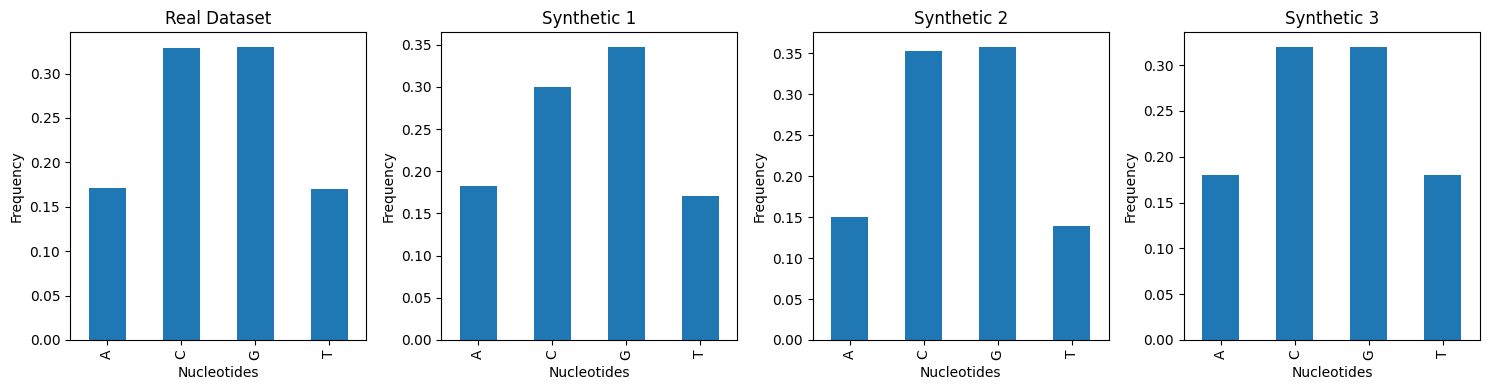

In [ ]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import pandas as pd

def calculate_nucleotide_freq(sequence):
    nucleotide_counts = {'A': 0, 'C': 0, 'G': 0, 'T': 0}
    total_nucleotides = len(sequence)

    for nucleotide in sequence:
        if nucleotide != 'N':
            nucleotide_counts[nucleotide] += 1

    nucleotide_freq = {key: count / (total_nucleotides - sequence.count('N')) for key, count in nucleotide_counts.items()}
    return nucleotide_freq

def plot_nucleotide_freq(ax, title, nucleotide_freq):
    df = pd.DataFrame(nucleotide_freq.values(), index=nucleotide_freq.keys(), columns=['Frequency'])
    df.plot(kind='bar', ax=ax, legend=False)
    ax.set_title(title)
    ax.set_xlabel('Nucleotides')
    ax.set_ylabel('Frequency')

real_fasta_path = '/content/drive/My Drive/data_for_gans/preprocessed_fastas/WuKou2016_filter-norm_to_512.fasta'
real_nucleotide_freq = {'A': 0, 'C': 0, 'G': 0, 'T': 0}

for record in SeqIO.parse(real_fasta_path, 'fasta'):
    sequence = str(record.seq).upper()
    nucleotide_freq = calculate_nucleotide_freq(sequence)

    for nucleotide, freq in nucleotide_freq.items():
        real_nucleotide_freq[nucleotide] += freq

synthetic_datasets_paths = ['/content/diff_generated_sequences_fulldata.fasta',
                            '/content/generated_sequences_vqvae_fulldata.fasta',
                            '/content/wgan_generated_sequences_fulldata.fasta']
synthetic_nucleotide_freqs = []

for synthetic_fasta_path in synthetic_datasets_paths:
    synthetic_nucleotide_freq = {'A': 0, 'C': 0, 'G': 0, 'T': 0}

    for record in SeqIO.parse(synthetic_fasta_path, 'fasta'):
        sequence = str(record.seq).upper()
        nucleotide_freq = calculate_nucleotide_freq(sequence)

        for nucleotide, freq in nucleotide_freq.items():
            synthetic_nucleotide_freq[nucleotide] += freq

    synthetic_nucleotide_freqs.append(synthetic_nucleotide_freq)

real_total = sum(real_nucleotide_freq.values())
real_nucleotide_freq = {key: value / real_total for key, value in real_nucleotide_freq.items()}

synthetic_normalized_freqs = []
for synthetic_nucleotide_freq in synthetic_nucleotide_freqs:
    synthetic_total = sum(synthetic_nucleotide_freq.values())
    synthetic_normalized_freq = {key: value / synthetic_total for key, value in synthetic_nucleotide_freq.items()}
    synthetic_normalized_freqs.append(synthetic_normalized_freq)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))

plot_nucleotide_freq(axes[0], 'Real Dataset', real_nucleotide_freq)

for i, (synthetic_freq, synthetic_fasta_path) in enumerate(zip(synthetic_normalized_freqs, synthetic_datasets_paths), start=1):
    plot_nucleotide_freq(axes[i], f'Synthetic {i}', synthetic_freq)

plt.tight_layout()
plt.show()

# Curax

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.spatial import KDTree
import editdistance
import re
from tabulate import tabulate

In [ ]:
from Bio import SeqIO

def read_fasta(file_path):
    sequences = []
    for record in SeqIO.parse(file_path, "fasta"):
        sequences.append(str(record.seq))
    return sequences

fasta_diff_path = "/content/curax_diff.fasta"
fasta_vae_path = "/content/curax_vqvae.fasta"
fasta_gan_path = "/content/curax_wgan.fasta"
real = "/content/curax_filter-norm_to_500.fasta"

target_length = 100
sequences_fasta_diff = read_fasta(fasta_diff_path)
sequences_fasta_vae = read_fasta(fasta_vae_path)
sequences_fasta_gan = read_fasta(fasta_gan_path)
sequences_real = read_fasta(fasta_gan_path)

In [ ]:
diversity_diff = calculate_diversity(sequences_fasta_diff, target_length)
diversity_vae = calculate_diversity(sequences_fasta_vae, target_length)
diversity_gan = calculate_diversity(sequences_fasta_gan, target_length)

In [ ]:
calculate_diversity(sequences_real, target_length)

72.2403758964636

In [ ]:
print(diversity_diff)
print(diversity_vae)
print(diversity_gan)

71.71727946127946
73.096767561058
72.2403758964636


In [ ]:
novelty_diff = calculate_novelty(sequences_fasta_diff, sequences_real, target_length)
novelty_vae = calculate_novelty(sequences_fasta_vae, sequences_real, target_length)
novelty_gan = calculate_novelty(sequences_fasta_gan, sequences_real, target_length)

In [ ]:
print(novelty_diff)
print(novelty_vae)
print(novelty_gan)

11.952247944676262
12.204599220644637
11.267886570316492


In [ ]:
def count_repeats(fasta_file):
    repeat_patterns = [
        r'(CG)+',
        r'(CACG)+',
        r'(CGGG)+',
        r'(CGTG)+',
        r'(CCCG)+',
        r'(CACGA)+',
        r'(CCGCG)+',
        r'(CGCGG)+',
        r'(CGAG)+',
        r'(GCGTG)+',
        r'(CAGCG)+',
        r'(CCTCG)+',
        r'(CATG)+',
        r'(CA)+',
        r'(CCCCCG)+',
        r'(CGGGGG)+',
        r'(CTCG)+',
        r'(CGGGG)+',
        r'(CCCCG)+',
    ]

    pattern_counts = {pattern: 0 for pattern in repeat_patterns}

    with open(fasta_file, 'r') as file:
        sequence = ''
        for line in file:
            if line.startswith('>'):
                for pattern in repeat_patterns:
                    pattern_counts[pattern] += len(re.findall(pattern, sequence))
                sequence = ''
            else:
                sequence += line.strip()

        for pattern in repeat_patterns:
            pattern_counts[pattern] += len(re.findall(pattern, sequence))

    return pattern_counts

def print_table(results):
    table_data = [(pattern, count) for pattern, count in results.items()]
    headers = ["Repeat Pattern", "Count"]
    print(tabulate(table_data, headers=headers, tablefmt="pretty"))


In [ ]:
fasta_file_path = '/content/curax_diff.fasta'
result = count_repeats(fasta_file_path)
print_table(result)

+----------------+-------+
| Repeat Pattern | Count |
+----------------+-------+
|     (CG)+      | 9843  |
|    (CACG)+     |  551  |
|    (CGGG)+     | 1828  |
|    (CGTG)+     |  768  |
|    (CCCG)+     | 1211  |
|    (CACGA)+    |  73   |
|    (CCGCG)+    |  492  |
|    (CGCGG)+    |  583  |
|    (CGAG)+     |  613  |
|    (GCGTG)+    |  381  |
|    (CAGCG)+    |  254  |
|    (CCTCG)+    |  180  |
|    (CATG)+     |  499  |
|     (CA)+      | 8709  |
|   (CCCCCG)+    |  154  |
|   (CGGGGG)+    |  292  |
|    (CTCG)+     |  525  |
|    (CGGGG)+    |  776  |
|    (CCCCG)+    |  444  |
+----------------+-------+


In [ ]:
fasta_file_path = '/content/curax_vqvae.fasta'
result = count_repeats(fasta_file_path)
print_table(result)

+----------------+-------+
| Repeat Pattern | Count |
+----------------+-------+
|     (CG)+      | 2073  |
|    (CACG)+     |  189  |
|    (CGGG)+     |  292  |
|    (CGTG)+     |  465  |
|    (CCCG)+     |  196  |
|    (CACGA)+    |  21   |
|    (CCGCG)+    |  36   |
|    (CGCGG)+    |  17   |
|    (CGAG)+     |  178  |
|    (GCGTG)+    |  135  |
|    (CAGCG)+    |  29   |
|    (CCTCG)+    |  48   |
|    (CATG)+     |  526  |
|     (CA)+      | 8858  |
|   (CCCCCG)+    |  11   |
|   (CGGGGG)+    |  21   |
|    (CTCG)+     |  130  |
|    (CGGGG)+    |  90   |
|    (CCCCG)+    |  43   |
+----------------+-------+


In [ ]:
fasta_file_path = '/content/curax_wgan.fasta'
result = count_repeats(fasta_file_path)
print_table(result)

+----------------+-------+
| Repeat Pattern | Count |
+----------------+-------+
|     (CG)+      | 9483  |
|    (CACG)+     |  560  |
|    (CGGG)+     | 1422  |
|    (CGTG)+     |  457  |
|    (CCCG)+     | 1479  |
|    (CACGA)+    |  71   |
|    (CCGCG)+    |  428  |
|    (CGCGG)+    |  483  |
|    (CGAG)+     |  691  |
|    (GCGTG)+    |  160  |
|    (CAGCG)+    |  312  |
|    (CCTCG)+    |  263  |
|    (CATG)+     |  481  |
|     (CA)+      | 8690  |
|   (CCCCCG)+    |  169  |
|   (CGGGGG)+    |  217  |
|    (CTCG)+     |  701  |
|    (CGGGG)+    |  582  |
|    (CCCCG)+    |  515  |
+----------------+-------+


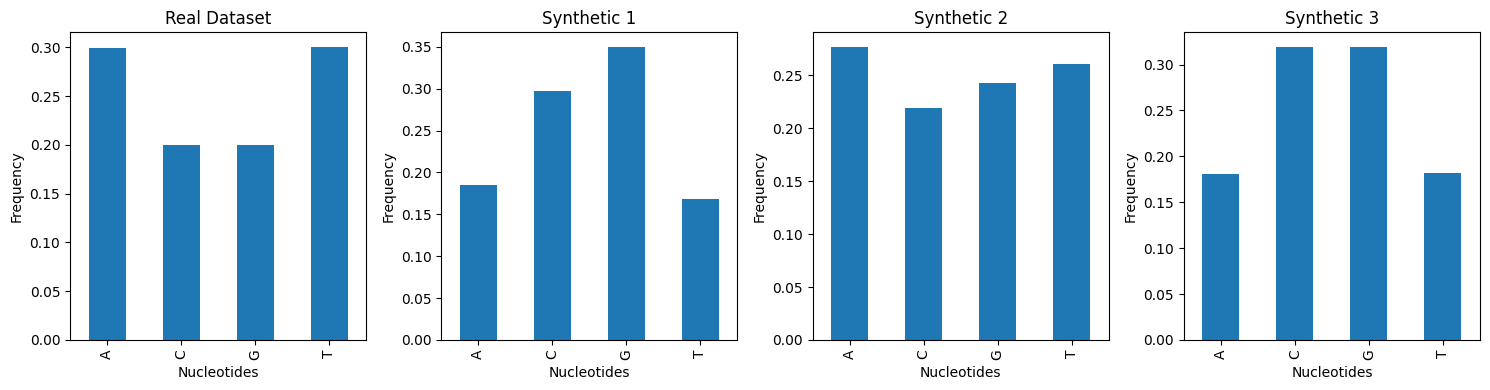

In [ ]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import pandas as pd

def calculate_nucleotide_freq(sequence):
    nucleotide_counts = {'A': 0, 'C': 0, 'G': 0, 'T': 0}
    total_nucleotides = len(sequence)

    for nucleotide in sequence:
        if nucleotide != 'N':
            nucleotide_counts[nucleotide] += 1

    nucleotide_freq = {key: count / (total_nucleotides) for key, count in nucleotide_counts.items()}
    return nucleotide_freq

def plot_nucleotide_freq(ax, title, nucleotide_freq):
    df = pd.DataFrame(nucleotide_freq.values(), index=nucleotide_freq.keys(), columns=['Frequency'])
    df.plot(kind='bar', ax=ax, legend=False)
    ax.set_title(title)
    ax.set_xlabel('Nucleotides')
    ax.set_ylabel('Frequency')

real_fasta_path = '/content/curax_filter-norm_to_500.fasta'
real_nucleotide_freq = {'A': 0, 'C': 0, 'G': 0, 'T': 0}

for record in SeqIO.parse(real_fasta_path, 'fasta'):
    sequence = str(record.seq).upper()
    nucleotide_freq = calculate_nucleotide_freq(sequence)

    for nucleotide, freq in nucleotide_freq.items():
        real_nucleotide_freq[nucleotide] += freq

synthetic_datasets_paths = ['/content/curax_diff.fasta',
                            '/content/curax_vqvae.fasta',
                            '/content/curax_wgan.fasta']
synthetic_nucleotide_freqs = []

for synthetic_fasta_path in synthetic_datasets_paths:
    synthetic_nucleotide_freq = {'A': 0, 'C': 0, 'G': 0, 'T': 0}

    for record in SeqIO.parse(synthetic_fasta_path, 'fasta'):
        sequence = str(record.seq).upper()
        nucleotide_freq = calculate_nucleotide_freq(sequence)

        for nucleotide, freq in nucleotide_freq.items():
            synthetic_nucleotide_freq[nucleotide] += freq

    synthetic_nucleotide_freqs.append(synthetic_nucleotide_freq)

real_total = sum(real_nucleotide_freq.values())
real_nucleotide_freq = {key: value / real_total for key, value in real_nucleotide_freq.items()}

synthetic_normalized_freqs = []
for synthetic_nucleotide_freq in synthetic_nucleotide_freqs:
    synthetic_total = sum(synthetic_nucleotide_freq.values())
    synthetic_normalized_freq = {key: value / synthetic_total for key, value in synthetic_nucleotide_freq.items()}
    synthetic_normalized_freqs.append(synthetic_normalized_freq)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))

plot_nucleotide_freq(axes[0], 'Real Dataset', real_nucleotide_freq)

for i, (synthetic_freq, synthetic_fasta_path) in enumerate(zip(synthetic_normalized_freqs, synthetic_datasets_paths), start=1):
    plot_nucleotide_freq(axes[i], f'Synthetic {i}', synthetic_freq)

plt.tight_layout()
plt.show()

# H-DNA


In [ ]:
from Bio import SeqIO

def read_fasta(file_path):
    sequences = []
    for record in SeqIO.parse(file_path, "fasta"):
        sequences.append(str(record.seq))
    return sequences

In [ ]:
# fasta_diff_path = "/content/diff_generated_G4.fasta"
fasta_vae_path = "/content/HDNA_vqvae.fasta"
fasta_gan_path = "/content/HDNA_wgan.fasta"

target_length = 100
# sequences_fasta_diff = read_fasta(fasta_diff_path)
sequences_fasta_vae = read_fasta(fasta_vae_path)
sequences_fasta_gan = read_fasta(fasta_gan_path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/HDNA_vqvae.fasta'

In [ ]:
diversity_vae = calculate_diversity(sequences_fasta_vae, target_length)
diversity_gan = calculate_diversity(sequences_fasta_gan, target_length)

In [ ]:
print(diversity_vae)
print(diversity_gan)

69.29813101425302
72.20337145743146


In [ ]:
fasta_vae_path = "/content/New_full_vqvae.fasta"
fasta_gan_path = "/content/New_Full_wgan.fasta"
fasta_diff_path = "/content/drive/My Drive/data_for_gans/HDNA_diff.fasta"
target_length = 100

sequences_fasta_diff = read_fasta(fasta_diff_path)
sequences_fasta_vae = read_fasta(fasta_vae_path)
sequences_fasta_gan = read_fasta(fasta_gan_path)

In [ ]:
diversity_vae = calculate_diversity(sequences_fasta_vae, target_length)
diversity_gan = calculate_diversity(sequences_fasta_gan, target_length)

In [ ]:
print(diversity_vae)
print(diversity_gan)

69.99264233350415
72.20366594706964


In [ ]:
sequences_fasta_diff = read_fasta(fasta_diff_path)

In [ ]:
diversity_diff = calculate_diversity(sequences_fasta_diff, target_length)
print(diversity_diff)

76.30756016690331


In [ ]:
real = "/content/drive/My Drive/data_for_gans/HDNA_filter-norm_to_500.fasta"

In [ ]:
novelty_vae = calculate_novelty(sequences_fasta_vae, real, target_length)
novelty_gan = calculate_novelty(sequences_fasta_gan, real, target_length)

In [ ]:
print(novelty_vae)
print(novelty_gan)

9.988110114937308
9.990559320560676


In [ ]:
novelty_diff = calculate_novelty(sequences_fasta_diff, real, target_length)

In [ ]:
print(novelty_diff)

9.987453226517694


In [ ]:
fasta_vae_Q = "/content/mmQ_vqvae.fasta"
fasta_vae_H = "/content/mmH_vqvae.fasta"
fasta_real_Q = "/content/mmQuad_filter-norm_to_500.fasta"
fasta_real_H = "/content/mmHDNA_filter-norm_to_500.fasta"
target_length = 100

sequences_fasta_1 = read_fasta(fasta_vae_Q)
sequences_fasta_2 = read_fasta(fasta_vae_H)
sequences_fasta_3 = read_fasta(fasta_real_Q)
sequences_fasta_4 = read_fasta(fasta_real_H)

In [ ]:
diversity_h = calculate_diversity(sequences_fasta_1, target_length)
diversity_q = calculate_diversity(sequences_fasta_2, target_length)

In [ ]:
print(diversity_h)
print(diversity_q)

73.01038322822517
73.00939879548679


In [ ]:
diversity_real_h = calculate_diversity(sequences_fasta_3, target_length)
diversity_real_q = calculate_diversity(sequences_fasta_4, target_length)

In [ ]:
print(diversity_real_h)
print(diversity_real_q)

64.2409303252624
64.37023728310655


In [ ]:
novelty_vae = calculate_novelty(sequences_fasta_1, sequences_fasta_3, target_length)
novelty_gan = calculate_novelty(sequences_fasta_2, sequences_fasta_4, target_length)

In [ ]:
print(novelty_vae)
print(novelty_gan)

9.78366677202356
9.799845859525457


T

In [ ]:
fasta_1 = "/content/diff_generated_sequences_1.fasta"
fasta_2 = "/content/diff_generated_sequences_10.fasta"
fasta_3 = "/content/diff_generated_sequences_1000.fasta"
target_length = 100

sequences_fasta_1 = read_fasta(fasta_1)
sequences_fasta_2 = read_fasta(fasta_2)
sequences_fasta_3 = read_fasta(fasta_3)

In [ ]:
diversity_1 = calculate_diversity(sequences_fasta_1, target_length)
diversity_2 = calculate_diversity(sequences_fasta_2, target_length)
diversity_3 = calculate_diversity(sequences_fasta_3, target_length)

In [ ]:
print(diversity_1)
print(diversity_2)
print(diversity_3)

76.27424236682205
75.74334457624336
71.8377888101464


In [ ]:
real = read_fasta("/content/mmHDNA_filter-norm_to_500.fasta")

In [ ]:
novelty_1 = calculate_novelty(sequences_fasta_1, real, target_length)
novelty_2 = calculate_novelty(sequences_fasta_2, real, target_length)
novelty_3 = calculate_novelty(sequences_fasta_3, real, target_length)

In [ ]:
print(novelty_1)
print(novelty_2)
print(novelty_3)

11.331149824199569
11.32749729360619
9.046285021966478


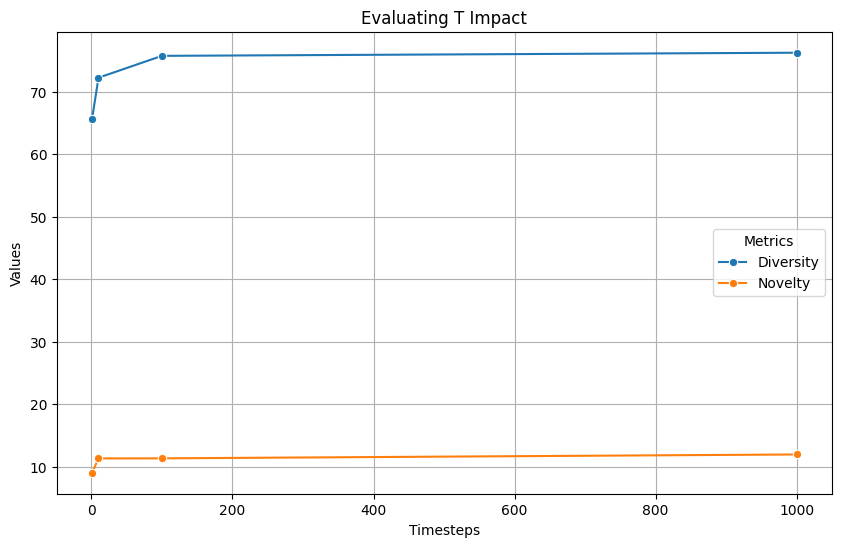

In [ ]:
fasta_4 = "/content/diff_generated_sequences_x2.fasta"

In [ ]:
sequences_fasta_4 = read_fasta(fasta_4)

In [ ]:
diversity_4 = calculate_diversity(sequences_fasta_4, target_length=100)

In [ ]:
diversity_4

76.31526888240421

In [ ]:
real = read_fasta("/content/diff_generated_sequences_1.fasta")

In [ ]:
calculate_novelty(sequences_fasta_4, real, target_length=100)

12.089991620953096

# mmQH

In [ ]:
real_q = "/content/mmHDNA_filter-norm_to_500.fasta"
real_h  = "/content/mmQuad_filter-norm_to_500.fasta"
target_length = 100

vae_h = "/content/mmH_vqvae.fasta"
vae_q = "/content/mmQ_vqvae.fasta"
vae_f = "/content/mmH+Q_vqvae.fasta"
gan_h = "/content/mm_HDNA_wgan.fasta"
gan_q = "/content/mm_Quad_wgan.fasta"
gan_f = "/content/mm_Quad+H_wgan.fasta"
diff_f  = "/content/diff_generated_sequences_mmH+Q.fasta"


In [ ]:
sequences_fasta_1 = read_fasta(real_q)
sequences_fasta_2 = read_fasta(vae_h)
sequences_fasta_3 = read_fasta(vae_q)
sequences_fasta_4 = read_fasta(vae_f)
sequences_fasta_5 = read_fasta(gan_h)
sequences_fasta_6 = read_fasta(gan_q)
sequences_fasta_7 = read_fasta(gan_f)
sequences_fasta_8 = read_fasta(diff_f)
sequences_fasta_9 = read_fasta(real_h)

In [ ]:
print(calculate_diversity(sequences_fasta_1, target_length=100))
print(calculate_diversity(sequences_fasta_2, target_length=100))
print(calculate_diversity(sequences_fasta_3, target_length=100))
print(calculate_diversity(sequences_fasta_4, target_length=100))
print(calculate_diversity(sequences_fasta_5, target_length=100))
print(calculate_diversity(sequences_fasta_6, target_length=100))
print(calculate_diversity(sequences_fasta_7, target_length=100))
print(calculate_diversity(sequences_fasta_8, target_length=100))
print(calculate_diversity(sequences_fasta_9, target_length=100))